In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from itertools import combinations as comb
import datetime 


import warnings
warnings.filterwarnings('ignore')



plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.shape

(1296675, 23)

# information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# introduction

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [7]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
drop = ['Unnamed: 0','cc_num','first', 'last','street',
        'zip','lat', 'long','trans_num', 'unix_time',
        'merch_lat', 'merch_long',]

df.drop(drop,axis=1,inplace=True)

# new feature

In [12]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [13]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df['day'] = df['trans_date_trans_time'].dt.day
df['weekofday'] = df['trans_date_trans_time'].dt.dayofweek

In [14]:
NE = ['NY','PA','VT','NH','ME','MA','RI','CT','NT']
S = ['MS','AL','TS','KY','OK','AR','TX','LA','SC','GA','FL','VA','DC','NC','WV']
W = ['WA','OR','CA','ID','MT','WY','UT','NV','AZ','CO','NM']
MW = ['SD','ND','NE','KS','IA','MO','MN','WI','IL','IN','MI','OH']

In [15]:
new = []
for x in df['state']:
    if x in NE:
        new.append('NE')
    elif x in S:
        new.append('S')
    elif x in W:
        new.append('W')
    else:
        new.append('MW')

df['state'] = new

In [16]:
other = ['Air cabin crew', 'Air traffic controller', 'Airline pilot','Amenity horticulturist','Applications developer','Archivist',
       'Armed forces logistics/support/administrative officer',
       'Armed forces technical officer','Cabin crew', 'Call centre manager', 
       'Careers adviser', 'Careers information officer', 
       'Catering manager', 'Ceramics designer', 'Charity fundraiser',
       'Charity officer', 'Chartered accountant',
       'Chief Executive Officer', 'Chief Financial Officer','Chief Marketing Officer', 'Chief Operating Officer',
       'Chief Strategy Officer', 'Chief Technology Officer',
       'Chief of Staff','Civil Service administrator','Community pharmacist','Comptroller',
       'Conservation officer, historic buildings','Copy','Corporate investment banker','Curator',
       'Dealer','Estate manager/land agent','Facilities manager', 'Farm manager','Firefighter', 'Fisheries officer',
       'Fitness centre manager', 'Forensic psychologist',
       'Forest/woodland manager','Heritage manager','Historic buildings inspector/conservation officer', 
       'Homeopath','Immigration officer',
       'Journalist, newspaper', 'Land','Landscape architect', 'Lawyer', 'Librarian, public', 'Licensed conveyancer',
       'Local government officer','Make','Personnel officer','Pilot, airline','Podiatrist', 'Police officer',
       "Politician's assistant",  'Press sub','Prison officer', 'Probation officer',
       'Race relations officer','Solicitor', 'Solicitor, Scotland',
       'Sports administrator','Sports development officer','Sub',  'Transport planner',
       'Volunteer coordinator','Warden/ranger', 'Warehouse manager', 'Writer','Product manager',]

industries = ['Administrator', 'Administrator, charities/voluntary organisations','Administrator, local government',
              'Advertising account executive', 'Advertising account planner','Advertising copywriter', 
              'Advice worker', 'Agricultural consultant', 'Aid worker', 'Air broker','Barista', 'Barrister',
              "Barrister's clerk", 'Bookseller','Community development worker','Company secretary',
              'Conservator, furniture','Copywriter, advertising','Counsellor','Development worker, community',
              'Development worker, international aid','Freight forwarder','Furniture conservator/restorer', 
              'Furniture designer','Gaffer','Garment/textile technologist',
              'Horticulturist, commercial','Hotel manager', 'Human resources officer',
              'Industrial buyer','Industrial/product designer','Environmental education officer',
              'Location manager','Logistics and distribution manager', 'Loss adjuster, chartered',
              'Management consultant','Marketing executive','Merchandiser, retail','Public affairs consultant',
              'Public house manager', 'Public librarian','Public relations account executive', 
              'Public relations officer','Purchasing manager', 'Quantity surveyor','Regulatory affairs officer', 
              'Restaurant manager, fast food', 'Retail banker', 'Retail buyer','Retail manager', 
              'Retail merchandiser', 'Risk analyst','Rural practice surveyor', 'Sales executive',
              'Sales promotion account executive','Secretary/administrator',
              'Textile designer','Buyer, industrial', 'Buyer, retail',]

law = ['Legal Secretary','Chartered legal executive (England and Wales)']

entertaiment = ['Tour manager', 'Tourism officer','Travel agency manager','Video editor',
                'Theatre director', 'Theatre manager', 'Theme park manager',
                'Television camera operator','Television floor manager', 'Television production assistant',
                'Television/film/video producer','Visual merchandiser','Tourist information centre manager',
                'Stage manager','Production assistant, radio', 'Production assistant, television',
                'Presenter, broadcasting','Press photographer','Glass blower/designer',
                'Designer, ceramics/pottery', 'Designer, exhibition/display',
                'Designer, furniture', 'Designer, industrial/product',
                'Designer, interior/spatial', 'Designer, jewellery',
                'Designer, multimedia', 'Designer, television/film set',
                'Designer, textile','Museum education officer','Museum/gallery conservator', 
                'Museum/gallery exhibitions officer','Producer, radio', 'Producer, television/film/video',
                'Product designer', 'Animator','Art gallery manager',  'Artist','Arts development officer',
                'Broadcast journalist', 'Broadcast presenter','Camera operator','Community arts worker',
                'Conservator, museum/gallery','Dancer','Editor, commissioning','Editor, film/video', 
                'Editor, magazine features','Exhibitions officer, museum/gallery','Film/video editor',
                'Fine artist','Illustrator','Jewellery designer','Magazine features editor', 'Magazine journalist',
                'Musician','Outdoor activities/education manager','Radio broadcast assistant','Radio producer',
                'Records manager','Set designer','Special effects artist','Interior and spatial designer',
                'Commissioning editor','Event organiser','Exhibition designer','Media planner',
                'Administrator, arts',]

IT = ['Systems analyst','Systems developer','Web designer','Sales professional, IT',
      'Programmer, applications', 'Programmer, multimedia','IT consultant', 'IT trainer',
      'Data scientist', 'Database administrator','Multimedia programmer','Network engineer',
      'Information officer','Information systems manager', ]

health = ['Therapist, art', 'Therapist, drama', 'Therapist, horticultural',
          'Therapist, music', 'Therapist, occupational', 'Therapist, sports',
          'Tree surgeon', 'Veterinary surgeon','Surgeon','Sport and exercise psychologist',
          'Psychiatric nurse', 'Psychiatrist', 'Psychologist, clinical',
          'Psychologist, counselling', 'Psychologist, forensic',
          'Psychologist, sport and exercise', 'Psychotherapist',
          'Psychotherapist, child','Physicist, medical',
          'Physiological scientist', 'Physiotherapist', 'Phytotherapist','Radiographer, diagnostic',
          'Radiographer, therapeutic','Neurosurgeon', "Nurse, children's",
          'Nurse, mental health', 'Nutritional therapist','Occupational hygienist', 'Occupational psychologist',
          'Occupational therapist','Health and safety adviser', 'Health physicist',
          'Health promotion specialist', 'Health service manager',
          'Health visitor','Paediatric nurse','Paramedic', 'Medical physicist', 'Medical sales representative',
          'Medical secretary', 'Medical technical officer','Mental health nurse',
          'Acupuncturist','Art therapist','Counselling psychologist','Dance movement psychotherapist',
          'Diagnostic radiographer','Doctor, hospital','Exercise physiologist','General practice doctor',
          'Horticultural therapist''Hospital doctor','Hospital pharmacist',
          'Ambulance person','Child psychotherapist','Doctor, general practice','Pharmacist, community',
          'Pharmacist, hospital','Music therapist','Learning disability nurse',]

engineer = ['Water engineer', 'Surveyor, hydrographic','Surveyor, land/geomatics', 'Surveyor, minerals',
            'Surveyor, mining', 'Surveyor, rural practice','Structural engineer',
            'Engineer, agricultural', 'Engineer, automotive',
            'Engineer, biomedical', 'Engineer, broadcasting (operations)',
            'Engineer, building services', 'Engineer, civil (consulting)',
            'Engineer, civil (contracting)', 'Engineer, communications',
            'Engineer, control and instrumentation', 'Engineer, drilling',
            'Engineer, electronics', 'Engineer, land', 'Engineer, maintenance',
            'Engineer, manufacturing', 'Engineer, materials','Engineer, mining', 'Engineer, petroleum', 
            'Engineer, production','Engineer, site', 'Engineer, structural','Aeronautical engineer',
            'Engineer, technical sales', 'Engineering geologist','Town planner',
            'Site engineer','Metallurgist','Minerals surveyor', 'Mining engineer', 'Mudlogger',
            'Materials engineer', 'Mechanical engineer','Biomedical engineer','Broadcast engineer',
            'Building control surveyor', 'Building services engineer','Building surveyor','Chemical engineer',
            'Civil Service fast streamer','Civil engineer, contracting', 'Claims inspector/assessor',
            'Commercial/residential surveyor','Communications engineer','Contracting civil engineer', 
            'Contractor','Control and instrumentation engineer','Dispensing optician','Drilling engineer',
            'Electrical engineer', 'Electronics engineer','Emergency planning/management officer',
            'Energy engineer', 'Energy manager', 'Engineer, aeronautical','Environmental consultant',
            'Environmental health practitioner', 'Environmental manager','Equality and diversity officer',
            'Field seismologist', 'Field trials officer','Geologist, engineering','Geologist, wellsite',
            'Horticultural consultant','Land/geomatics surveyor','Maintenance engineer','Manufacturing engineer', 
            'Manufacturing systems engineer',
            'Nature conservation officer', 'Naval architect','Petroleum engineer',
            'Planning and development surveyor','Plant breeder/geneticist','Product/process development scientist',
            'Production engineer', 'Production manager','Quarry manager','Architect',]

finance = ['Tax adviser','Trade mark attorney', 'Trading standards officer','Tax inspector',
           'Accountant, chartered','Accountant, chartered certified',
           'Accountant, chartered public finance', 'Accounting technician','Senior tax professional/tax inspector',
           'Financial adviser', 'Financial trader',
           'Futures trader','Insurance broker','Insurance claims handler', 'Insurance risk surveyor',
           'Insurance underwriter', 'Intelligence analyst','Interpreter','Investment analyst', 
           'Investment banker, corporate','Investment banker, operational', 'Market researcher',
           'Media buyer','Patent attorney','Pension scheme manager', 'Pensions consultant','Ship broker',
           'Chartered loss adjuster', 'Chartered public finance accountant','Equities trader',]

Researcher = ['Wellsite geologist','Waste management officer','Water quality scientist','Technical brewer',
              'Statistician','Science writer', 'Scientific laboratory technician',
              'Scientist, audiological', 'Scientist, biomedical',
              'Scientist, clinical (histocompatibility and immunogenetics)',
              'Scientist, marine', 'Scientist, physiological',
              'Scientist, research (maths)', 'Scientist, research (medical)',
              'Scientist, research (physical sciences)','Toxicologist','Soil scientist',
              'Telecommunications researcher','Social research officer, government', 'Social researcher',
              'Research scientist (life sciences)', 'Research scientist (maths)','Research scientist (medical)',
              'Research scientist (physical sciences)','Seismic interpreter','Pharmacologist',
              'Programme researcher,broadcasting/film/video','Analytical chemist','Animal nutritionist', 
              'Animal technologist','Hydrographic surveyor','Hydrogeologist',  'Hydrologist','Arboriculturist', 
              'Archaeologist','Architectural technologist','Audiological scientist','Biochemist, clinical',
              'Biomedical scientist','Cartographer','Chemist, analytical','Clinical biochemist', 
              'Clinical cytogeneticist','Clinical psychologist', 'Clinical research associate',
              'Clothing/textile technologist', 'Colour technologist','Commercial horticulturist',
              'Cytogeneticist','Ecologist', 'Economist','Embryologist, clinical','Oceanographer', 'Oncologist',
              'Operational researcher', 'Operations geologist','Optician, dispensing', 
              'Optometrist', 'Orthoptist', 'Osteopath','Pathologist','Immunologist','Chiropodist',
              'Research officer, political party','Research officer, trade union','Geneticist, molecular', 'Geochemist', 
              'Geophysicist/field seismologist','Geoscientist','Herbalist','Herpetologist']

education = ['TEFL teacher','Teacher, English as a foreign language',
             'Teacher, adult education', 'Teacher, early years/pre',
             'Teacher, primary school', 'Teacher, secondary school',
             'Teacher, special educational needs',
             'Teaching laboratory technician','Primary school teacher',
             'Private music teacher','Secondary school teacher','Academic librarian',
             'Administrator, education','Armed forces training and education officer',
             'Community education officer','Early years teacher','Education administrator',
             'Education officer, museum','Educational psychologist','English as a foreign language teacher',
             'English as a second language teacher','Higher education careers adviser',
             'Learning mentor', 'Lecturer, further education','Lecturer, higher education',
             'Professor Emeritus','Music tutor','Training and development officer',
             'Special educational needs teacher','Librarian, academic','Education officer, community',
             'Environmental education officer','Associate Professor','Further education lecturer',]

In [17]:
new_job = []
for x in df['job']:
    if x in entertaiment:
        new_job.append('entertaiment')
    elif x in health:
        new_job.append('health')
    elif x in education:
        new_job.append('education')
    elif x in IT:
        new_job.append('IT')
    elif x in Researcher:
        new_job.append('Researcher')
    elif x in industries:
        new_job.append('industries')
    elif x in law:
        new_job.append('law')
    elif x in finance:
        new_job.append('finance')
    else:
        new_job.append('other')

In [18]:
df['job'] = new_job

In [19]:
df['age'] =-(df['dob'].dt.year - datetime.date.today().year)

In [20]:
df.drop('dob', axis=1, inplace=True)

# Exploratory Data Analysis

In [21]:
fraud = df['is_fraud'].value_counts()
idx = fraud.index
val = fraud.values

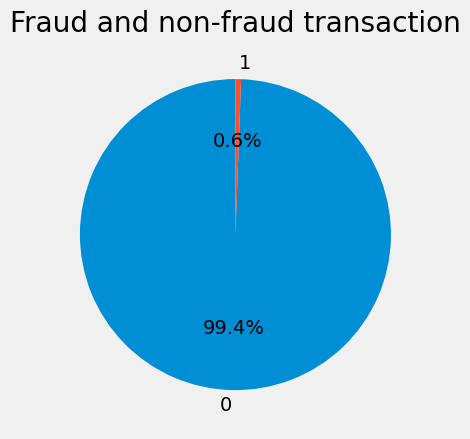

In [22]:
plt.pie(val,
        labels = idx,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Fraud and non-fraud transaction')
plt.show()

# interpretation

Based on the pie chart above, it can be seen that the number of fraud transactions that occurred from 2019 to 2020 was 7506 cases or equivalent to 0.6% of all transactions. in 2019 there were 5220 cases while in 2020 there were 2286 cases of fraud transactions that occurred.

In [23]:
fraud = df[df['is_fraud']==1]
fraud['is_fraud'] = np.where(fraud['is_fraud']==1,'fraud','')

# interpretation

In the world of payments, a fraudulent transaction is an unauthorized or illegal transaction. For example, a credit card transaction that the cardholder is not aware of. Those who make such fraudulent transactions are usually called fraudsters, and use card information to purchase goods/services for their own benefit.

Based on the data that I took from Kaggle, it can be seen in terms of time when these fraud transactions often occur. the table has given time data in the form of dates and hours which I can then extract in the form of years, months, dates, days, and hours so that it can be seen in detail when fraud transactions occur.

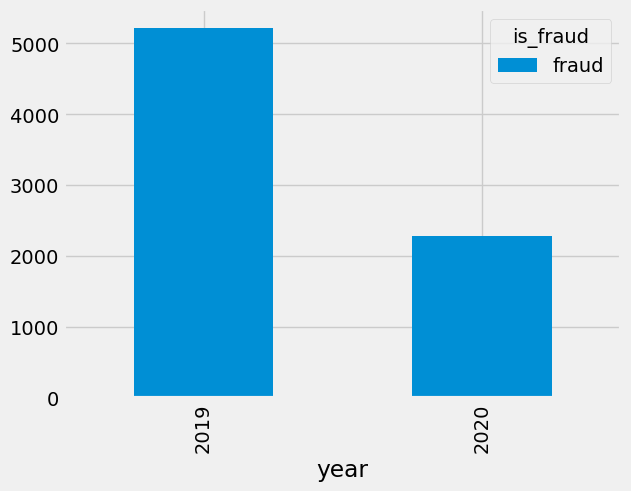

In [24]:
pd.crosstab(fraud['year'], fraud['is_fraud']).plot(kind='bar')
plt.show()

# intrepation

It can be seen that in 2019 there were more fraud transactions compared to 2020. This can be caused by the advancement of technology to anticipate crimes in the use of payment instruments other than by users. but it should also be noted that security is always following the development of increasingly sophisticated and increasingly complex payment instrument breach techniques. so it is necessary to continue to develop good protection even though crime is decreasing, so that money or data owned by customers does not fall into the hands of bad people who then use what is not their right properly.

In [25]:
month = []
c = ['Jan', 'Feb', 'Mar', 'Apr',
     'Mei', 'Jun', 'Jul', 'Aug',
     'Sep', 'Okt', 'Nov', 'Des']
for num in fraud['month']:
    month.append(c[num-1])
    
fraud['month'] = month

In [28]:
fraud19 = fraud[fraud['year']==2019]
fraud20 = fraud[fraud['year']==2020]

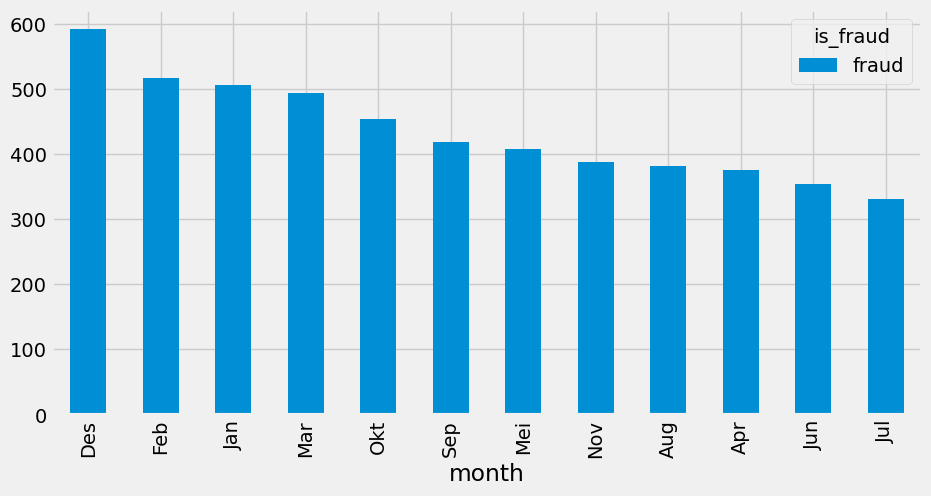

is_fraud  fraud
month          
Des         592
Feb         517
Jan         506
Mar         494
Okt         454
Sep         418
Mei         408
Nov         388
Aug         382
Apr         376
Jun         354
Jul         331


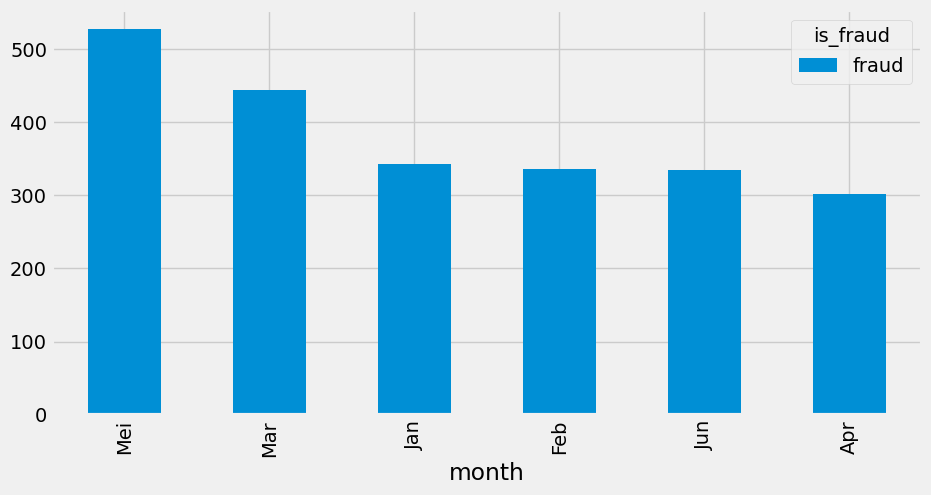

is_fraud  fraud
month          
Mei         527
Mar         444
Jan         343
Feb         336
Jun         334
Apr         302


In [29]:
fig = pd.crosstab(fraud19['month'], fraud19['is_fraud'])
fig.sort_values('fraud', ascending=False).plot(kind='bar',figsize=(10,5), sort_columns=False)
plt.show()
a = pd.crosstab(fraud19['month'], fraud19['is_fraud']).sort_values('fraud', ascending=False)
print(a)

fig = pd.crosstab(fraud20['month'], fraud20['is_fraud'])
fig.sort_values('fraud', ascending=False).plot(kind='bar',figsize=(10,5), sort_columns=False)
plt.show()
a = pd.crosstab(fraud23['month'], fraud23['is_fraud']).sort_values('fraud', ascending=False)
print(a)

# intrpeataion

In [ ]:
It can be seen in the 2019 data that most fraud transactions occurred at the beginning of January to March and the peak occurred at the end of the year, namely in December approaching the turn of the year. while in 2020 due to data limitations it can only be seen that March and May. this illustrates the different behavior of criminals conducting fraud transactions in different months in different years (except March).

In [30]:
day = []
c = ['Mon','Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Mon']
for num in fraud['weekofday']:
    day.append(c[num-1])
fraud['weekofday'] = day

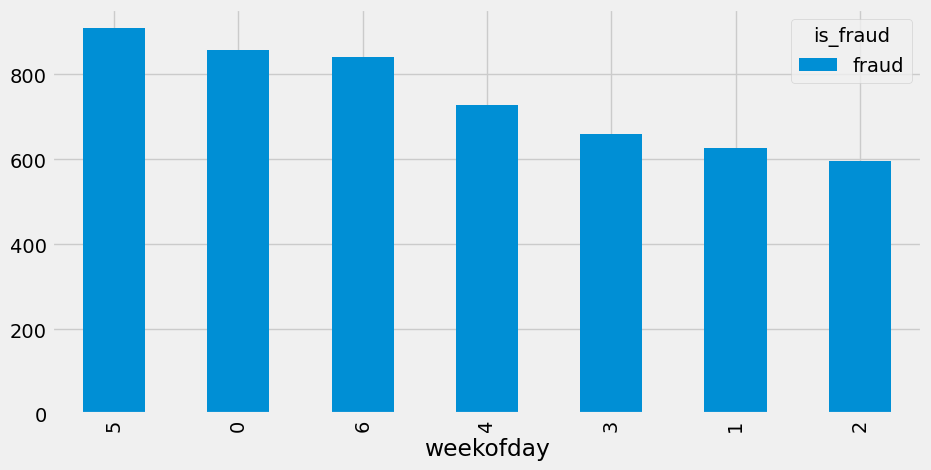

is_fraud   fraud
weekofday       
5            908
0            858
6            842
4            729
3            659
1            627
2            597


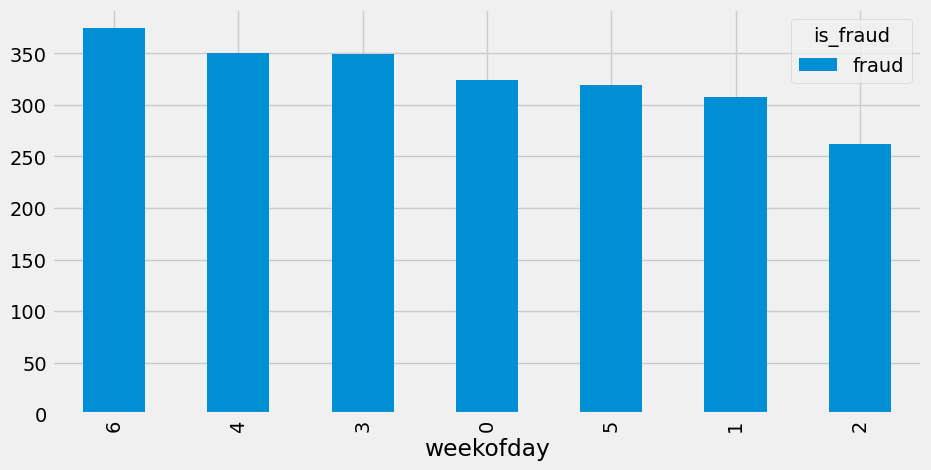

is_fraud   fraud
weekofday       
6            374
4            350
3            349
0            324
5            319
1            308
2            262


In [31]:
fig = pd.crosstab(fraud19['weekofday'], fraud19['is_fraud'])
fig.sort_values('fraud', ascending=False).plot(kind='bar',figsize=(10,5), sort_columns=False)
plt.show()
a = pd.crosstab(fraud19['weekofday'], fraud19['is_fraud']).sort_values('fraud', ascending=False)
print(a)

fig = pd.crosstab(fraud20['weekofday'], fraud20['is_fraud'])
fig.sort_values('fraud', ascending=False).plot(kind='bar',figsize=(10,5), sort_columns=False)
plt.show()
a = pd.crosstab(fraud23['weekofday'], fraud20['is_fraud']).sort_values('fraud', ascending=False)
print(a)

# intrapation

In [ ]:
if you pay attention to the day where fraud transactions occur, Monday is the most days where fraud transactions occur followed by Friday and Saturday in 2019. While in 2020 apart from Monday, many also occurred on Saturday and Thursday. while on Tuesday in 2019 and 2020 both the least fraud transactions occurred.

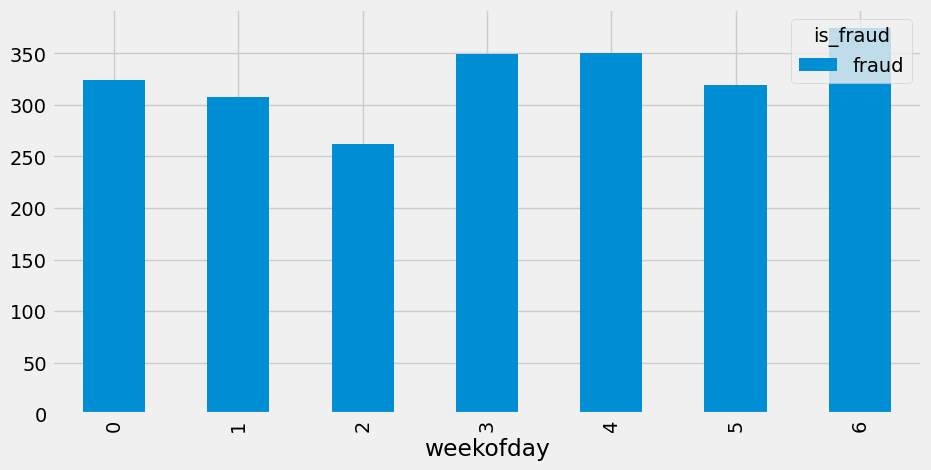

is_fraud  fraud
day            
12          237
28          229
11          229
20          224
14          209
29          208
25          197
22          193
23          187
19          184
13          182
26          176
3           170
30          169
10          166
2           165
8           158
15          154
17          153
7           152
27          149
4           149
16          143
21          138
31          137
24          133
18          133
5           131
1           128
6           127
9           110


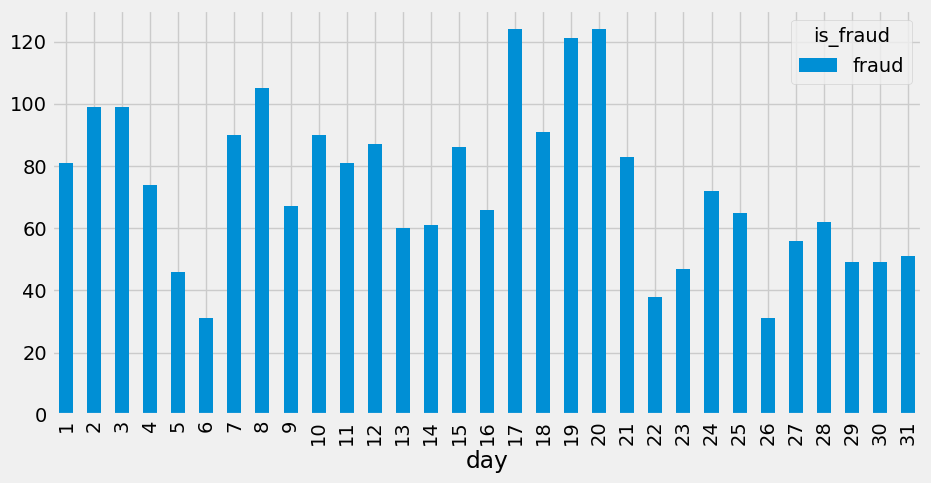

is_fraud  fraud
day            
17          124
20          124
19          121
8           105
3            99
2            99
18           91
7            90
10           90
12           87
15           86
21           83
1            81
11           81
4            74
24           72
9            67
16           66
25           65
28           62
14           61
13           60
27           56
31           51
29           49
30           49
23           47
5            46
22           38
6            31
26           31


In [32]:
ig = pd.crosstab(fraud19['day'], fraud19['is_fraud'])
fig.plot(kind='bar', figsize=(10,5))
plt.show()

a = pd.crosstab(fraud19['day'], fraud19['is_fraud']).sort_values('fraud', ascending=False)
print(a)

fig = pd.crosstab(fraud20['day'], fraud20['is_fraud'])
fig.plot(kind='bar', figsize=(10,5))
plt.show()

a = pd.crosstab(fraud20['day'], fraud20['is_fraud']).sort_values('fraud', ascending=False)
print(a)

In [ ]:
# intrepation

When viewed from which dates fraud transactions often occur, it can be concluded that in the middle of the month 10-20 is the date that fraud transactions occur most frequently, both in 2019 and 2020.

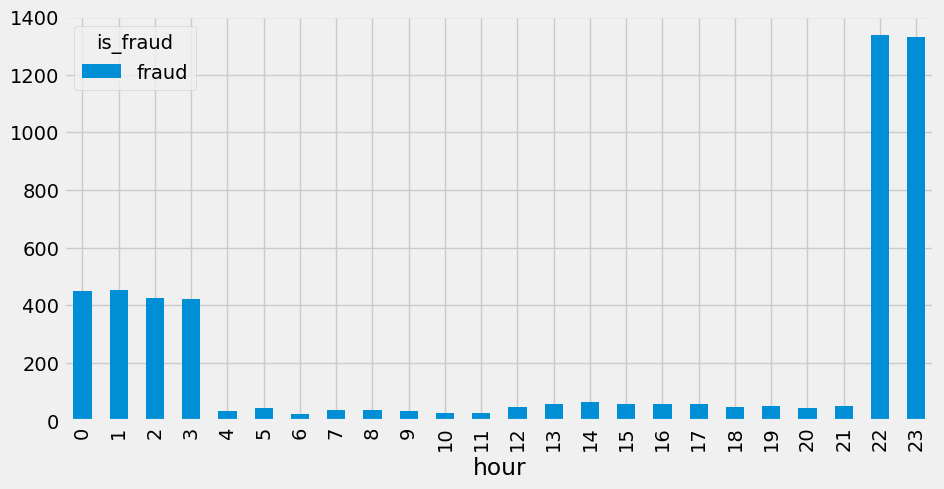

is_fraud  fraud
hour           
22         1337
23         1331
1           453
0           449
2           425
3           423
14           67
17           58
16           58
13           57
15           57
21           51
19           50
12           48
18           47
20           45
5            44
8            38
7            37
9            35
4            34
11           27
10           26
6            23


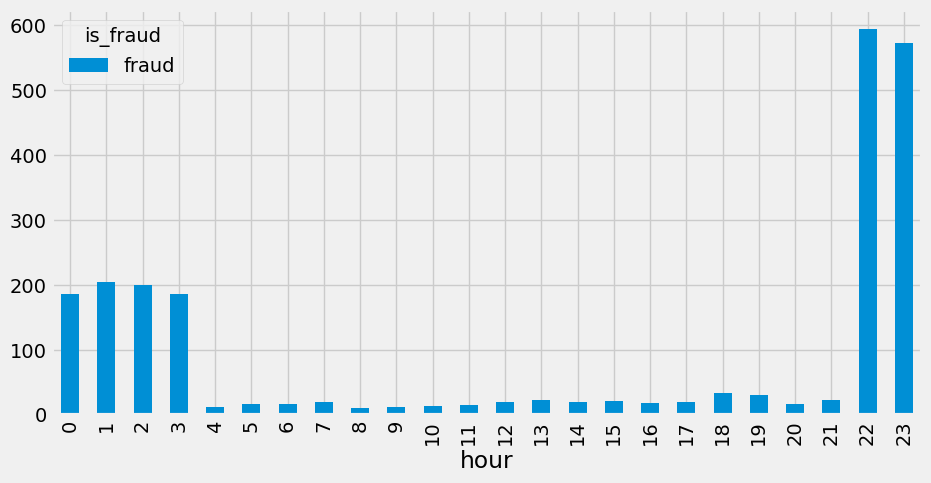

is_fraud  fraud
hour           
22          594
23          573
1           205
2           200
0           186
3           186
18           34
19           31
13           23
21           23
15           22
17           20
14           19
12           19
7            19
16           18
6            17
20           17
5            16
11           15
10           14
4            12
9            12
8            11


In [40]:
fig = pd.crosstab(fraud19['hour'], fraud19['is_fraud'])
fig.plot(kind='bar', figsize=(10,5))
plt.show()

a = pd.crosstab(fraud19['hour'], fraud19['is_fraud']).sort_values('fraud', ascending=False)
print(a)

fig = pd.crosstab(fraud20['hour'], fraud20['is_fraud'])
fig.plot(kind='bar', figsize=(10,5))
plt.show()

a = pd.crosstab(fraud20['hour'], fraud20['is_fraud']).sort_values('fraud', ascending=False)
print(a)

In [ ]:
# intrepation

In [ ]:
when viewed from the hours of criminal acts in the form of fraud transactions both in 2019 and 2020 often occur at 10 pm to 3 am.

# Univariate Analysis : Numerical

In [33]:
df_num = ['amt', 'city_pop', 'age']

In [34]:
def outlier(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    outlier = []
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)
            
    non_outlier = []
    for num in x:
        if num >= lower_fence:
            non_outlier.append(num)
        if num <= upper_fence:
            non_outlier.append(num)
    
    print(f'sum of unique value : {len(outlier)}' )
    print(f'lower_value: {np.min(non_outlier)}')
    print(f'upper_vaue: {np.max(non_outlier)}')

1. amt


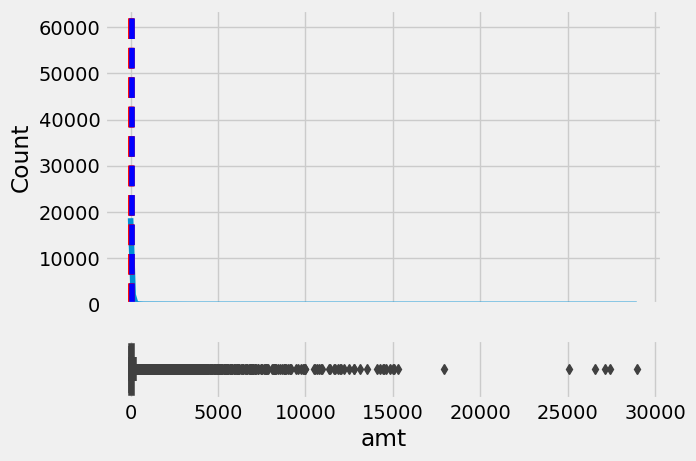

 
 
sum of unique value : 67290
lower_value: 1.0
upper_vaue: 28948.9
 
Data skewed with skew is 1761.3263053068902
 
Data not normal
--------------------------------------------------
 
2. city_pop


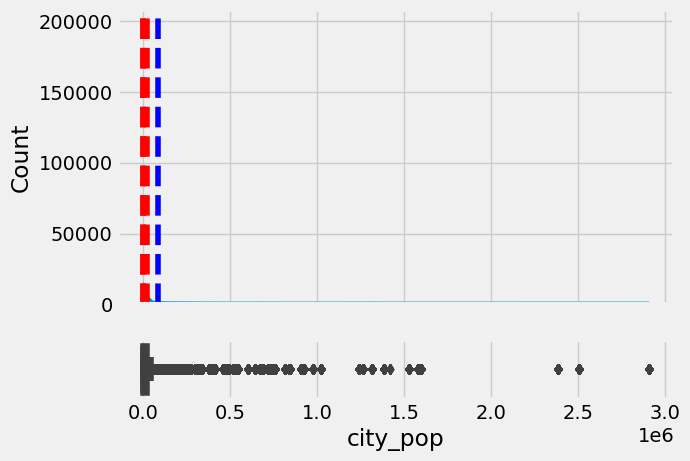

 
 
sum of unique value : 242674
lower_value: 23
upper_vaue: 2906700
 
Data skewed with skew is 995.5647455277281
 
Data not normal
--------------------------------------------------
 
3. age


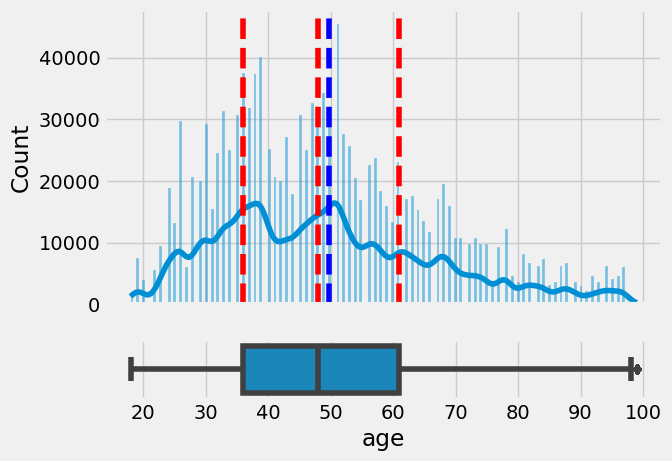

 
 
sum of unique value : 536
lower_value: 18
upper_vaue: 99
 
Data skewed with skew is 263.095714901634
 
Data not normal
--------------------------------------------------
 


In [35]:
norm_data = []
for y,x in enumerate(df_num,1):
    print(f'{y}. {x}')
    fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[5,1]})
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    ax[0].axvline(np.nanpercentile(df[x], 25), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 50), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 75), c='red',linestyle='--')
    ax[0].axvline(np.mean(df[x]), c='blue',linestyle='--')
    
    sns.boxplot(data=df, x=x, ax=ax[1])
    ax[1].set_xlabel(f'{x}')
    plt.show()
    print(' ')
    df[x].describe()
    print(' ')
    outlier(df[x])
    print(' ')
    sk, pval = st.skewtest(df[x])
    if pval < 0.05:
        print(f'Data skewed with skew is {sk}')
    else:
        print(f'Data not skewed')
    print(' ')
    norm, pval = st.normaltest(df[x])
    if pval < 0.05:
        print(f'Data not normal')
    else:
        print(f'Data normal')
        norm_data.append(x)
    print('-'*50)
    print(' ')

# Bivariate Analysis : Numerical

1. amt - city_pop


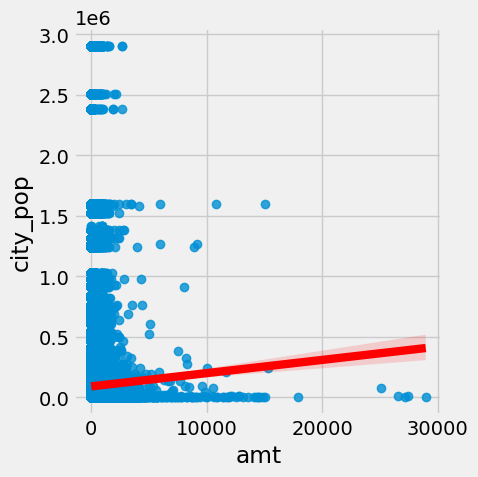

data have spearman correlation with spesification:
corr: -0.023559356785674092
pvalue: 1.400900815551818e-158
Low corr between amt and city_pop
 
 
2. amt - age


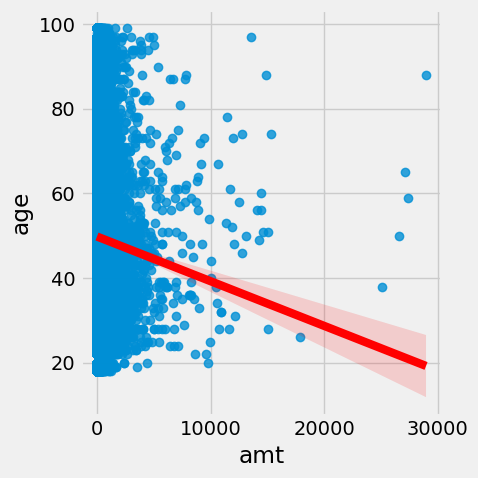

data have spearman correlation with spesification:
corr: -0.023569077956793305
pvalue: 1.0402986534776044e-158
Low corr between amt and age
 
 
3. city_pop - age


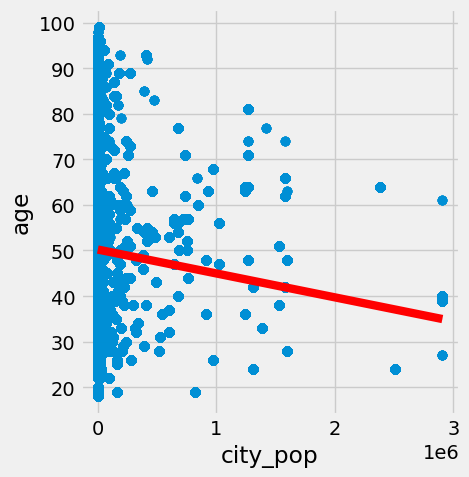

data have spearman correlation with spesification:
corr: -0.15719685568976852
pvalue: 0.0
Low corr between city_pop and age
 
 


In [43]:
y=1
high_cor = []
low_cor = []
for col1, col2 in comb(df_num,2):
    if (col1 != 'Response') & (col2 != 'Response'):
        plt.figure(figsize=(5,5))
        print(f'{y}. {col1} - {col2}')
        df_na = df.dropna()
        sns.regplot(data=df_na, x=col1, y=col2, line_kws={'color':'red'})
        plt.tight_layout()
        plt.show()
        if (col1 in norm_data) & (col2 in norm_data):
            pear, pval1 = st.pearsonr(df_na[col1],df_na[col2])
            print(f'data have pearson correlation with spesification:')
            print(f'corr: {pear}')
            print(f'pvalue: {pval1}')
            if (pear > 0.8) | (pear < -0.8):
                high_cor.append([col1,col2])
                print(f'High corr between {col1} and {col2}')
            else:
                low_cor.append([col1,col2])
                print(f'Low corr between {col1} and {col2}')
        else:
            spear, pval2 = st.spearmanr(df_na[col1],df_na[col2])
            print(f'data have spearman correlation with spesification:')
            print(f'corr: {spear}')
            print(f'pvalue: {pval2}')
            if (spear > 0.9) | (spear < -0.9):
                high_cor.append([col1,col2])
                print(f'High corr between {col1} and {col2}')
            else:
                low_cor.append([col1,col2])
                print(f'Low corr between {col1} and {col2}')
        print(' ')

        y+=1
        print(' ')

# Univariate Analysis : Categorical

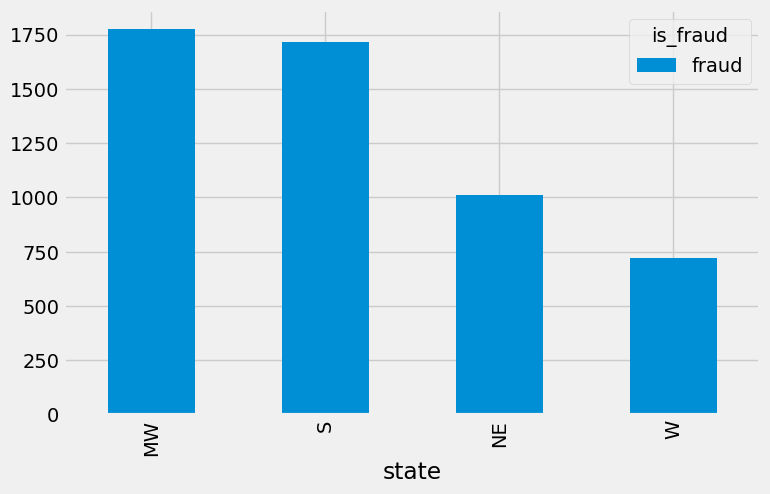

is_fraud  fraud
state          
MW         1776
S          1714
NE         1009
W           721


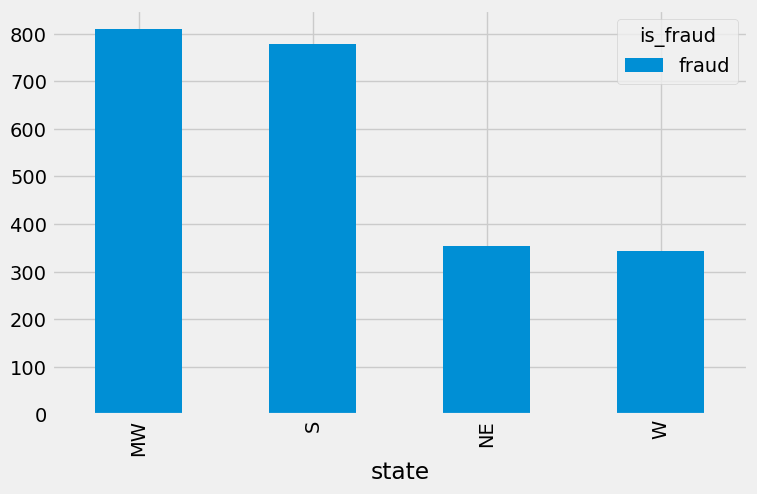

is_fraud  fraud
state          
MW          810
S           779
NE          354
W           343
 
Note:
MW : Mid West
S : South
W : West
NE : North East


In [44]:
fig = pd.crosstab(fraud19['state'], fraud19['is_fraud'])
fig.sort_values('fraud', ascending=False).plot(kind='bar', figsize=(8,5))
plt.show()

a = pd.crosstab(fraud19['state'], fraud19['is_fraud']).sort_values('fraud', ascending=False)
print(a)

fig = pd.crosstab(fraud20['state'], fraud20['is_fraud'])
fig.sort_values('fraud', ascending=False).plot(kind='bar', figsize=(8,5))
plt.show()

a = pd.crosstab(fraud20['state'], fraud20['is_fraud']).sort_values('fraud', ascending=False)
print(a)
print(' ')
print('Note:')
print('MW : Mid West')
print('S : South')
print('W : West')
print('NE : North East')

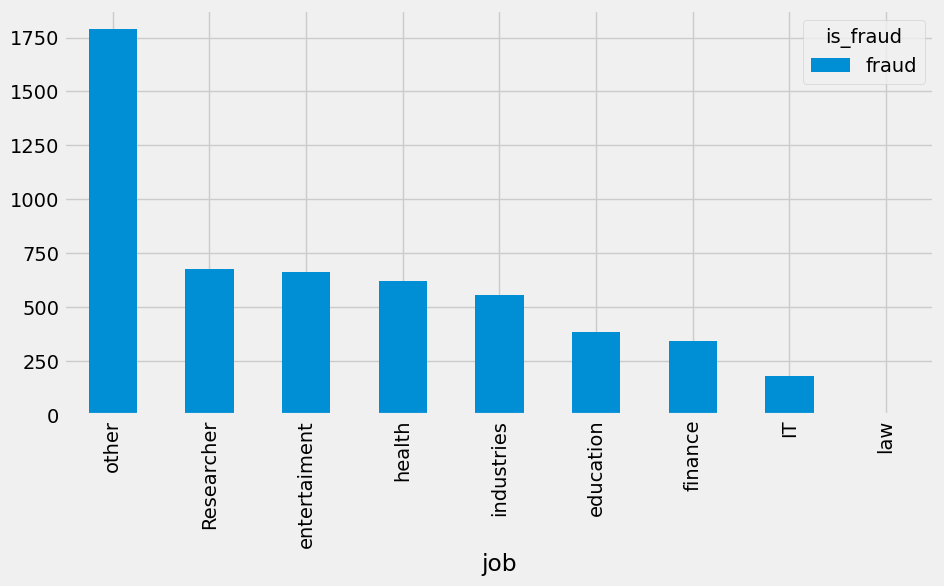

is_fraud      fraud
job                
other          1789
Researcher      675
entertaiment    662
health          623
industries      557
education       384
finance         343
IT              178
law               9


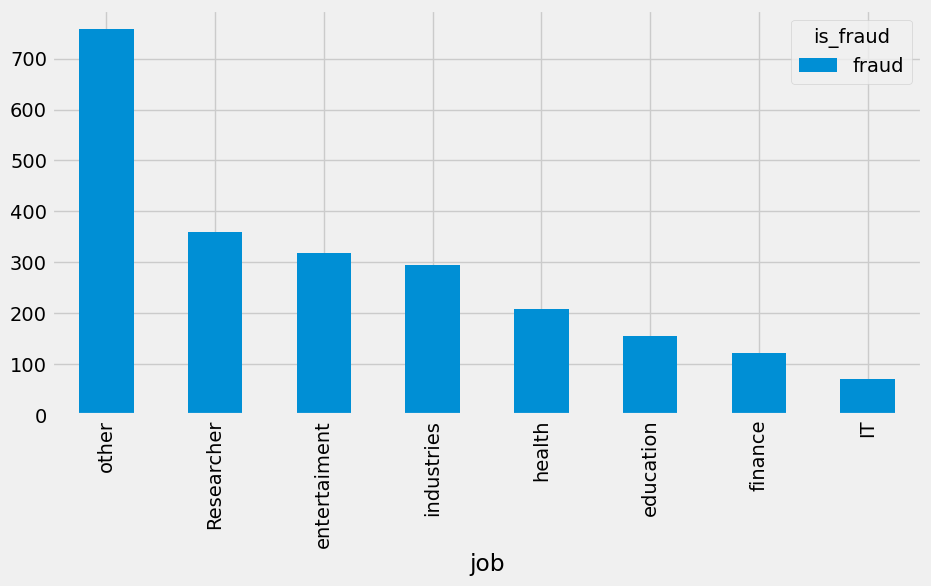

is_fraud      fraud
job                
other           758
Researcher      360
entertaiment    319
industries      295
health          207
education       154
finance         122
IT               71


In [42]:
fig = pd.crosstab(fraud19['job'], fraud19['is_fraud'])
fig.sort_values('fraud', ascending=False).plot(kind='bar', figsize=(10,5))
plt.show()

a = pd.crosstab(fraud19['job'], fraud19['is_fraud']).sort_values('fraud', ascending=False)
print(a)

fig = pd.crosstab(fraud20['job'], fraud20['is_fraud'])
fig.sort_values('fraud', ascending=False).plot(kind='bar', figsize=(10,5))
plt.show()

a = pd.crosstab(fraud20['job'], fraud20['is_fraud']).sort_values('fraud', ascending=False)
print(a)

In [ ]:
# Multivariate Analysis

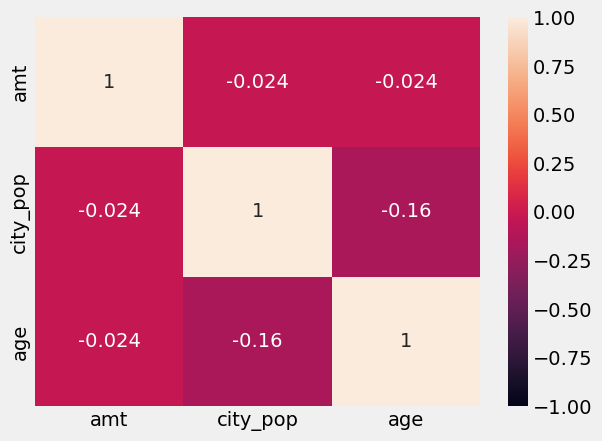

In [39]:
corr = df[df_num].corr(method='spearman')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1,)
plt.show()

In [ ]:
total_upi_transactions = df[df['category'] == 'UPI']['cc_name'].nunique()
print("Total UPI transactions:", total_upi_transactions)
